# 1 - Perkenalan

Nama : Mehdi Mursalat Ismail

Batch : FTDS-020-RMT

Dataset : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

Objective : Dapat melakukan prediksi klasifikasi terhadap Sleep Disorder pasien

# 2 - Import Libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import json
import pickle



# 3 - Data Loading

In [40]:
df = pd.read_csv('h8dsft_P1M2_mehdi.csv')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [41]:
df.tail(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
364,365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
365,366,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
366,367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
367,368,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [42]:
df_dupe = df.copy()

In [43]:
df_dupe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# 4 - Exploratory Data Analysis (EDA)

Reason of EDA: Untuk mengetahui persebaran price pada dataset dan mengetahui pengaruh distance terhadap price

<Figure size 1600x500 with 0 Axes>

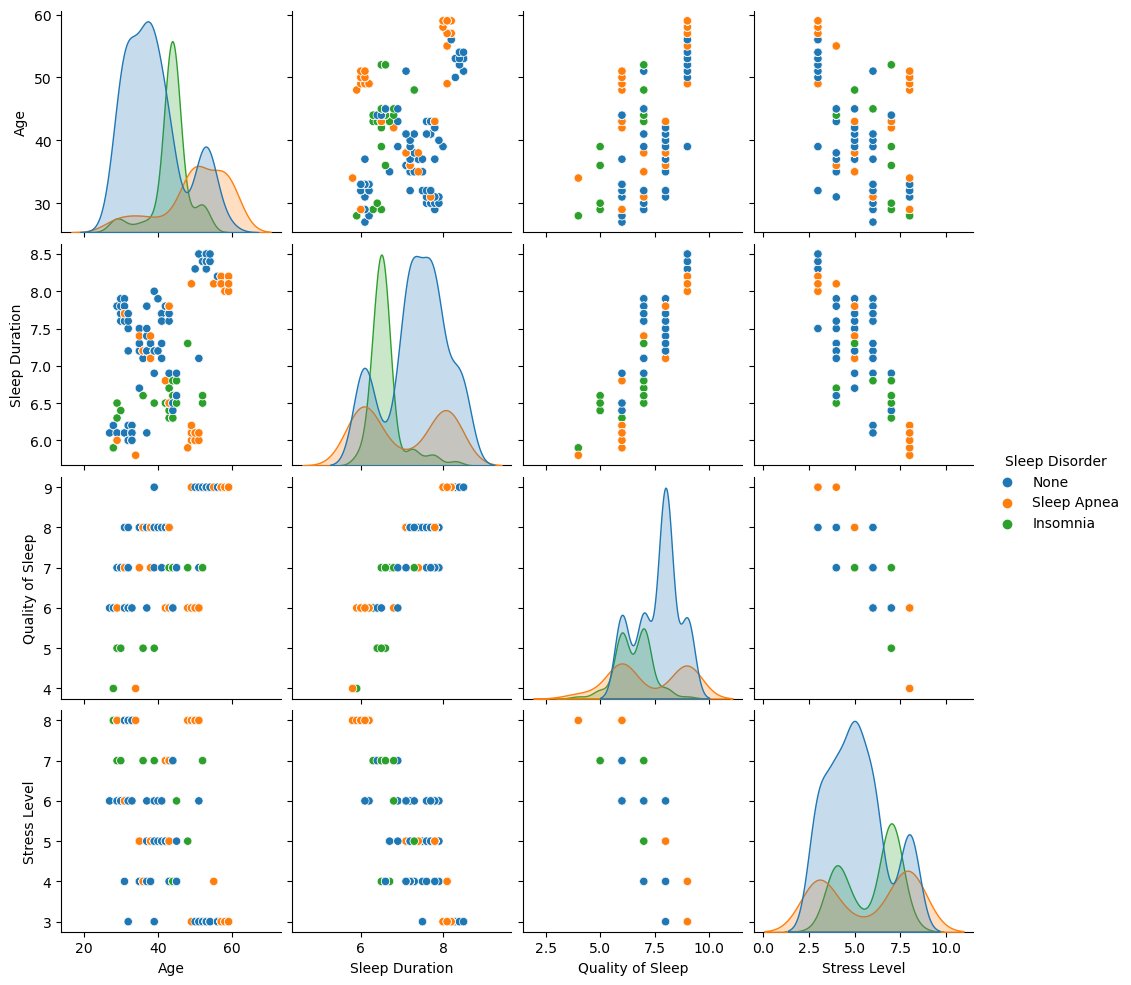

In [44]:
plt.figure(figsize=(16, 5))
sns.pairplot(
    df_dupe,
    x_vars=["Age", "Sleep Duration", "Quality of Sleep", "Stress Level"],
    y_vars=["Age", "Sleep Duration", "Quality of Sleep", "Stress Level"],
    hue="Sleep Disorder"
)
plt.show()

In [45]:
df_dupe.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Statement: 

1. Mayoritas pasien yang mengidap Sleep Apnea berusia 50 sampai 60 tahun
2. Pasien yang tidak memiliki Sleep Disorder memiliki stress level 5
3. Mayoritas pasien dengan mengidap Insomnia memiliki durasi tidur dibawah 7 jam

# 5 - Feature Engineering

## Split between `X` (Features) and `y` (Target) and Feature Selection

In [46]:
X = df_dupe.drop(['Sleep Disorder','Person ID'], axis=1)
y = df_dupe['Sleep Disorder']
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000


Person ID saya drop karena bersifat unik untuk tiap datanya sehingga tidak relevan

## Split between Train-set and Test-set

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (299, 11)
Test Size :  (75, 11)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
231,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000
217,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000
340,Female,55,Nurse,8.1,9,75,4,Overweight,140/95,72,5000
254,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000
29,Male,30,Doctor,7.9,7,75,6,Normal,120/80,70,8000
...,...,...,...,...,...,...,...,...,...,...,...
240,Female,44,Teacher,6.5,7,45,4,Overweight,135/90,65,6000
313,Female,52,Engineer,8.4,9,30,3,Normal,125/80,65,5000
143,Female,38,Accountant,7.1,8,60,4,Normal,115/75,68,7000
241,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000


## Missing Value Handling

In [48]:
# Check Missing Values on `X_train`

X_train.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

In [49]:
# Check Missing Values on `X_test`

X_test.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

In [50]:
# Check Missing Values on `y_train`

y_train.isnull().sum()

0

In [51]:
# Check Missing Values on `y_test`

y_test.isnull().sum()

0

## Split between Numeric Columns and Category Columns

In [52]:
# Get Numeric Columns and Category Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Cat Columns :  ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']


In [53]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
231,44,6.3,6,45,7,72,6000
217,43,7.8,8,90,5,70,8000
340,55,8.1,9,75,4,72,5000
254,45,6.5,7,45,4,65,6000
29,30,7.9,7,75,6,70,8000
...,...,...,...,...,...,...,...
240,44,6.5,7,45,4,65,6000
313,52,8.4,9,30,3,65,5000
143,38,7.1,8,60,4,68,7000
241,44,6.3,6,45,7,72,6000


## Feature Scaling

In [54]:
# Display `X_train`

X_train_num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
231,44,6.3,6,45,7,72,6000
217,43,7.8,8,90,5,70,8000
340,55,8.1,9,75,4,72,5000
254,45,6.5,7,45,4,65,6000
29,30,7.9,7,75,6,70,8000
...,...,...,...,...,...,...,...
240,44,6.5,7,45,4,65,6000
313,52,8.4,9,30,3,65,5000
143,38,7.1,8,60,4,68,7000
241,44,6.3,6,45,7,72,6000


In [55]:
X_train_num.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,42.013378,7.146823,7.317726,58.989967,5.357860,70.117057,6793.311037
std,8.678823,0.790982,1.176983,20.795502,1.746241,4.196876,1621.775709
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,42.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,49.500000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [56]:
# Feature Scaling using MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[ 0.2292883 , -1.07239144, -1.12145626, ...,  0.9419622 ,
         0.44940565, -0.48998205],
       [ 0.11387213,  0.82716449,  0.58065248, ..., -0.20527486,
        -0.02793818,  0.74530153],
       [ 1.49886609,  1.20707568,  1.43170685, ..., -0.77889339,
         0.44940565, -1.10762383],
       ...,
       [-0.46320868, -0.05929495,  0.58065248, ..., -0.77889339,
        -0.50528202,  0.12765974],
       [ 0.2292883 , -1.07239144, -1.12145626, ...,  0.9419622 ,
         0.44940565, -0.48998205],
       [-0.57862484,  0.32061624,  0.58065248, ..., -0.20527486,
        -0.50528202,  0.74530153]])

## Feature Encoding

In [57]:
# Display `X_train_cat`

X_train_cat

,Gender,Occupation,BMI Category,Blood Pressure
231,Male,Salesperson,Overweight,130/85
217,Male,Engineer,Normal,130/85
340,Female,Nurse,Overweight,140/95
254,Female,Teacher,Overweight,135/90
29,Male,Doctor,Normal,120/80
...,...,...,...,...
240,Female,Teacher,Overweight,135/90
313,Female,Engineer,Normal,125/80
143,Female,Accountant,Normal,115/75
241,Male,Salesperson,Overweight,130/85


In [58]:
# Feature Encoding using Ordinal Encoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[ 1.,  7.,  3., 14.],
       [ 1.,  2.,  0., 14.],
       [ 0.,  5.,  3., 22.],
       ...,
       [ 0.,  0.,  0.,  0.],
       [ 1.,  7.,  3., 14.],
       [ 1.,  3.,  0., 14.]])

## Concate between Numeric Columns and Category Columns

In [59]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[ 0.2292883 , -1.07239144, -1.12145626, ...,  7.        ,
         3.        , 14.        ],
       [ 0.11387213,  0.82716449,  0.58065248, ...,  2.        ,
         0.        , 14.        ],
       [ 1.49886609,  1.20707568,  1.43170685, ...,  5.        ,
         3.        , 22.        ],
       ...,
       [-0.46320868, -0.05929495,  0.58065248, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2292883 , -1.07239144, -1.12145626, ...,  7.        ,
         3.        , 14.        ],
       [-0.57862484,  0.32061624,  0.58065248, ...,  3.        ,
         0.        , 14.        ]])

In [60]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender,Occupation,BMI Category,Blood Pressure
0,0.229288,-1.072391,-1.121456,-0.673868,0.941962,0.449406,-0.489982,1.0,7.0,3.0,14.0
1,0.113872,0.827164,0.580652,1.493689,-0.205275,-0.027938,0.745302,1.0,2.0,0.0,14.0
2,1.498866,1.207076,1.431707,0.771170,-0.778893,0.449406,-1.107624,0.0,5.0,3.0,22.0
3,0.344704,-0.819117,-0.270402,-0.673868,-0.778893,-1.221298,-0.489982,0.0,10.0,3.0,19.0
4,-1.386538,0.953802,-0.270402,0.771170,0.368344,-0.027938,0.745302,1.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.229288,-0.819117,-0.270402,-0.673868,-0.778893,-1.221298,-0.489982,0.0,10.0,3.0,19.0
295,1.152618,1.586987,1.431707,-1.396387,-1.352512,-1.221298,-1.107624,0.0,2.0,0.0,8.0
296,-0.463209,-0.059295,0.580652,0.048651,-0.778893,-0.505282,0.127660,0.0,0.0,0.0,0.0
297,0.229288,-1.072391,-1.121456,-0.673868,0.941962,0.449406,-0.489982,1.0,7.0,3.0,14.0


# 6 - Model Definition

Model yang dibuat menggunakan algoritma klasifikasi yaitu Logistic Regression, SVM, Decision Tree, dan Random Forest

In [61]:
# Model SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Model Logistic Regression
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Model Decision Tree
dt_pipe = Pipeline([
    ('dt', DecisionTreeClassifier())
])

# Model Random Forest
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])


Define Hyperparameter

In [62]:
# Parameter untuk SVM
svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': [0.1, 1, 'scale']
}

# Parameter untuk Logistic Regression
logreg_params = {
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear', 'lbfgs']
}

# Parameter untuk Decision Tree
dt_params = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 5, 10, 20]
}

# Parameter untuk Random Forest
rf_params = {
    'rf__n_estimators': [50, 100, 200],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': [None, 5, 10, 20]
}


Cross Validation

In [63]:
# Hyperparameter tuning untuk SVM
svm_grid = GridSearchCV(svm_pipe, svm_params, cv=5, n_jobs=-1)

# Hyperparameter tuning untuk Logistic Regression
logreg_grid = GridSearchCV(logreg_pipe, logreg_params, cv=5, n_jobs=-1)

# Hyperparameter tuning untuk Decision Tree
dt_grid = GridSearchCV(dt_pipe, dt_params, cv=5, n_jobs=-1)

# Hyperparameter tuning untuk Random Forest
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, n_jobs=-1)

# 7 - Model Training

In [64]:
svm_grid.fit(X_train_final, y_train)
logreg_grid.fit(X_train_final, y_train)
dt_grid.fit(X_train_final, y_train)
rf_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 5, 10, 20],
                         'rf__n_estimators': [50, 100, 200]})

# 8 - Model Evaluation

In [65]:
# Evaluasi model SVM
svm_best_model = svm_grid.best_estimator_
svm_pred = svm_best_model.predict(X_test_final)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_pred))

# Evaluasi model Logistic Regression
logreg_best_model = logreg_grid.best_estimator_
logreg_pred = logreg_best_model.predict(X_test_final)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print(classification_report(y_test, logreg_pred))

# Evaluasi model Decision Tree
dt_best_model = dt_grid.best_estimator_
dt_pred = dt_best_model.predict(X_test_final)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))

# Evaluasi model Random Forest
rf_best_model = rf_grid.best_estimator_
rf_pred = rf_best_model.predict(X_test_final)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))


SVM Accuracy: 0.92
              precision    recall  f1-score   support

    Insomnia       0.79      0.85      0.81        13
        None       0.95      0.98      0.96        42
 Sleep Apnea       0.94      0.85      0.89        20

    accuracy                           0.92        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75

Logistic Regression Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

    Insomnia       0.85      0.85      0.85        13
        None       0.95      0.98      0.96        42
 Sleep Apnea       0.95      0.90      0.92        20

    accuracy                           0.93        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.93      0.93        75

Decision Tree Accuracy: 0.8933333333333333
              precision    recall  f1-score   support

    Insomnia       0.73      0.85      0.79        13
        None      

Statement :

Model terbaik adalah Logistic Regression dan Random Forest dengan akurasi dan recall yang sama yaitu: 

    1. Akurasi: 0.933
    2. Recall: 0.91

Recall dipilih karena, recall tinggi menunjukkan bahwa model dapat dengan baik mengenali sebagian besar kasus sleep disorder positif, mengurangi kemungkinan kasus yang terlewat.

# 9 - Model Saving

In [66]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('best_model_logreg.pkl', 'wb') as file_5:
  pickle.dump(logreg_best_model, file_5)

with open('best_model_svm.pkl', 'wb') as file_6:
  pickle.dump(svm_best_model, file_6)

with open('best_model_dt.pkl', 'wb') as file_7:
  pickle.dump(dt_best_model, file_7)

with open('best_model_rf.pkl', 'wb') as file_8:
  pickle.dump(rf_best_model, file_8)


# 10 - Model Inference

## Load Model

In [67]:
# Load All Files

with open('best_model_logreg.pkl', 'rb') as file_1:
  logreg_best_model = pickle.load(file_1)

with open('best_model_svm.pkl', 'rb') as file_6:
  svm_best_model = pickle.load(file_6)

with open('best_model_dt.pkl', 'rb') as file_7:
  dt_best_model = pickle.load(file_7)

with open('best_model_rf.pkl', 'rb') as file_8:
  rf_best_model = pickle.load(file_8)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = pickle.load(file_2)

with open('model_encoder.pkl','rb') as file_3:
  model_encoder = pickle.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

## Inferencing

In [68]:
# Create New Data

data_inf = {
    "Gender":"Male",
    "Age":27,
    "Occupation":"Software Engineer",
    "Sleep Duration":6.1,
    "Quality of Sleep":6,
    "Physical Activity Level":42,
    "Stress Level":6,
    "BMI Category":"Overweight",
    "Blood Pressure":"126/83",
    "Heart Rate":77,
    "Daily Steps":4200
}

data_inf = pd.DataFrame([data_inf])
data_inf


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200


In [69]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]
data_inf_num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.1,6,42,6,77,4200


In [70]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

Logistic Regression

In [71]:
logreg_y_pred_inf = logreg_best_model.predict(data_inf_final)
logreg_y_pred_inf

array(['None'], dtype=object)

SVM

In [72]:
svm_y_pred_inf = svm_best_model.predict(data_inf_final)
svm_y_pred_inf

array(['None'], dtype=object)

Decision Tree

In [73]:
dt_y_pred_inf = dt_best_model.predict(data_inf_final)
dt_y_pred_inf

array(['None'], dtype=object)

Random Forest

In [74]:
rf_y_pred_inf = rf_best_model.predict(data_inf_final)
rf_y_pred_inf

array(['None'], dtype=object)

# 11 - Kesimpulan

In [75]:
# List All Columns

X_train_final_df.columns

MultiIndex([(                    'Age',),
            (         'Sleep Duration',),
            (       'Quality of Sleep',),
            ('Physical Activity Level',),
            (           'Stress Level',),
            (             'Heart Rate',),
            (            'Daily Steps',),
            (                 'Gender',),
            (             'Occupation',),
            (           'BMI Category',),
            (         'Blood Pressure',)],
           )

1. Didapatkan hasil prediksi dari semua model untuk sleep disorder dengan menggunakan input dari data pertama terklasifikasi kedalam kelas "None", hasil ini sesuai dengan value pada dataset.
2. Dapat disimpulkan berdasarkan hasil model evaluation model terbaik dalam memprediki sleep disorder merupakan algoritma klasisfikasi Logistic Regression dan Random Forest dengan tingkat akurasi sebesar 0.933 dan recall sebesar 0.91